생성된 가상 평점 데이터프레임 (일부):
        content_1  content_2  content_3  content_4  content_5  content_6  \
user_1          2          2          5          1          2          2   
user_2          0          3          4          1          2          3   
user_3          2          4          0          5          5          0   
user_4          3          2          0          4          5          4   
user_5          2          1          2          3          0          5   

        content_7  content_8  content_9  content_10  ...  content_41  \
user_1          5          4          2           5  ...           3   
user_2          3          0          2           1  ...           2   
user_3          0          4          3           3  ...           2   
user_4          2          2          4           0  ...           5   
user_5          4          4          4           4  ...           5   

        content_42  content_43  content_44  content_45  content_46  \
user_1           

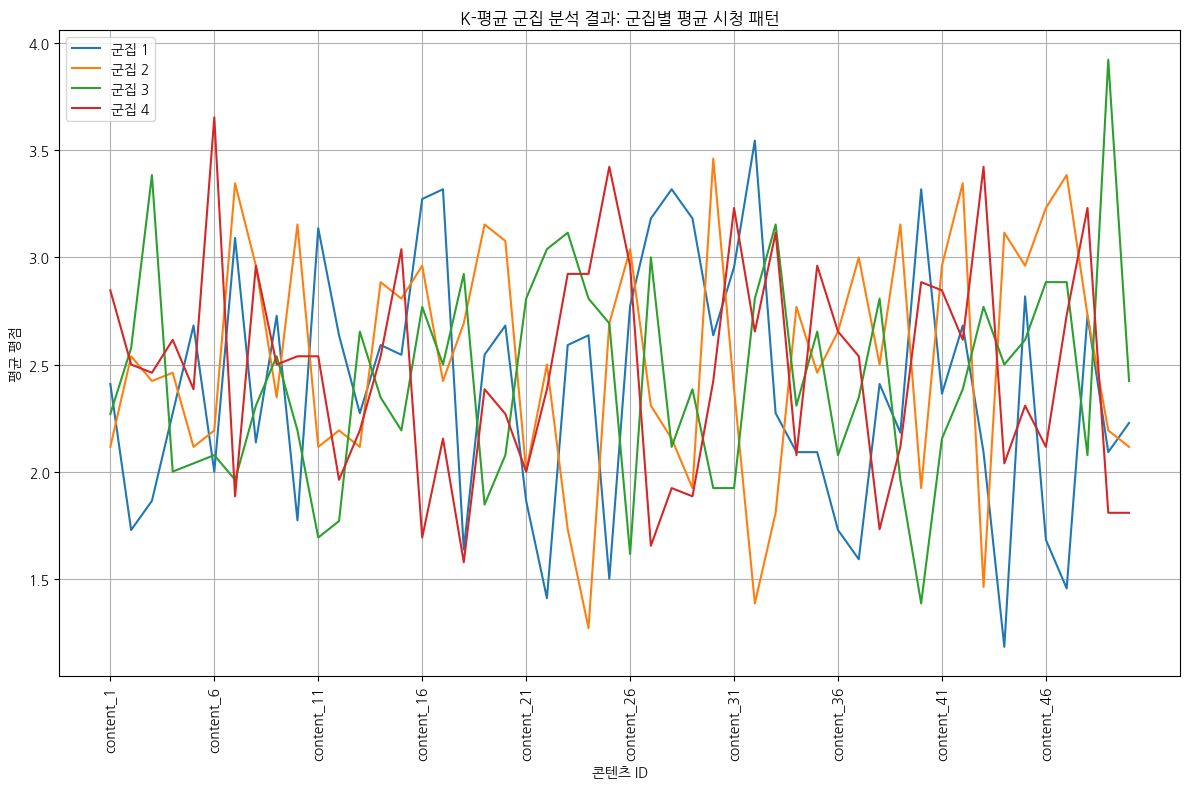

In [1]:
# 파일명: 가상_넷플릭스_데이터_생성.ipynb

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# -----------------------------------------------------------
# 1. 환경 설정 및 라이브러리 설치 안내
# -----------------------------------------------------------
# 이 코드를 실행하기 위해 필요한 패키지를 설치하는 방법입니다.
# 사용하시는 가상 환경 이름은 'mldl_env_250804'를 자동으로 사용합니다.
# 터미널에서 다음 명령어를 실행하여 필요한 라이브러리를 설치하세요.
# python3 -m pip install scikit-learn pandas numpy matplotlib

# -----------------------------------------------------------
# 2. 한글 폰트 설정
# -----------------------------------------------------------
# matplotlib에서 한글을 정상적으로 표시하기 위해 폰트를 설정합니다.
# 'NanumGothic' 폰트가 설치되어 있지 않으면 경고가 발생할 수 있습니다.
# 폰트가 없는 경우, 'NanumGothic'을 설치하거나 다른 한글 폰트 이름을 사용하세요.
try:
    font_path = fm.findfont(fm.FontProperties(family='NanumGothic'))
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
except:
    print("경고: NanumGothic 폰트를 찾을 수 없습니다. 한글을 올바르게 표시하려면 한글 폰트를 설치하세요.")

# -----------------------------------------------------------
# 3. 가상의 넷플릭스 데이터 생성
# -----------------------------------------------------------
# 100명의 사용자(user)와 50개의 콘텐츠(content)를 가정합니다.
num_users = 100
num_contents = 50

# 사용자와 콘텐츠 ID를 생성합니다.
users = [f'user_{i}' for i in range(1, num_users + 1)]
contents = [f'content_{i}' for i in range(1, num_contents + 1)]

# 사용자와 콘텐츠 간의 가상 평점 데이터를 생성합니다.
# 1~5점 사이의 평점을 무작위로 할당하며, 0은 시청하지 않았음을 의미합니다.
# 데이터가 너무 희소하지 않도록 일부 평점만 0으로 만듭니다.
# 0~5점 사이의 랜덤 정수를 생성합니다.
ratings = np.random.randint(0, 6, size=(num_users, num_contents))

# 평점 데이터프레임(DataFrame)을 생성합니다.
df_ratings = pd.DataFrame(ratings, index=users, columns=contents)

print("생성된 가상 평점 데이터프레임 (일부):")
print(df_ratings.head())

# -----------------------------------------------------------
# 4. 데이터 전처리 및 비지도 학습 준비
# -----------------------------------------------------------
# K-평균 군집 분석을 위해 데이터를 준비합니다.
# 평점 데이터프레임을 배열 형태로 변환합니다.
X = df_ratings.values

# -----------------------------------------------------------
# 5. K-평균 군집 분석 적용
# -----------------------------------------------------------
# 군집의 개수(K)를 4로 설정합니다.
# KMeans 모델을 초기화하고 훈련시킵니다.
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)

# 각 사용자가 어떤 군집에 속하는지 확인합니다.
# 이 결과는 각 사용자의 시청 패턴이 어떤 그룹에 속하는지를 나타냅니다.
user_clusters = kmeans.labels_

print("\n각 사용자가 속한 군집 (일부):")
print(user_clusters[:10])

# -----------------------------------------------------------
# 6. 군집 결과 분석
# -----------------------------------------------------------
# 각 군집의 중심점(centroid)을 확인합니다.
# 중심점은 각 군집에 속한 사용자의 평균 시청 패턴을 보여줍니다.
centroids = kmeans.cluster_centers_

# 군집 중심점을 시각화하여 각 그룹의 특징을 파악합니다.
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.plot(centroids[i], label=f'군집 {i+1}')
plt.title('K-평균 군집 분석 결과: 군집별 평균 시청 패턴')
plt.xlabel('콘텐츠 ID')
plt.ylabel('평균 평점')
plt.xticks(np.arange(0, num_contents, 5), contents[0::5], rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------
# 7. 결론 및 다음 단계
# -----------------------------------------------------------
# 이 시각화 결과는 4개의 군집이 각기 다른 콘텐츠 선호도를 가지고 있음을 보여줍니다.
# 예를 들어, 특정 군집은 특정 콘텐츠에 높은 평점을 준 반면, 다른 군집은 낮은 평점을 주었을 수 있습니다.
# 이 정보를 활용해 아직 보지 않은 콘텐츠 중 같은 군집의 사용자가 높게 평가한 콘텐츠를 추천할 수 있습니다.
# 더 나아가, 각 군집의 특징을 분석하여 "이 그룹은 액션 영화를 좋아하는구나"와 같은 통찰을 얻을 수 있습니다.
